# Cogs final project: Housing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from statsmodels.regression.linear_model import OLS
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold

# Exploration

In [2]:
#1990 census data
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape
df.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [4]:
df['total_bedrooms'].value_counts()

280.0     55
331.0     51
345.0     50
393.0     49
343.0     49
          ..
2205.0     1
1448.0     1
1691.0     1
2537.0     1
2546.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

In [5]:
df['total_bedrooms'].isna().sum()

207

In [6]:
df=df.dropna()

In [7]:
df.count()

longitude             20433
latitude              20433
housing_median_age    20433
total_rooms           20433
total_bedrooms        20433
population            20433
households            20433
median_income         20433
median_house_value    20433
ocean_proximity       20433
dtype: int64

In [8]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
#change ocean prox into number values
#<1H OCEAN = 0
#INLAND = 1
#NEAR OCEAN = 2
#NEAR BAY = 3
#ISLAND = 4

df['ocean_proximity'].replace('<1H OCEAN', 0,inplace=True)
df['ocean_proximity'].replace('INLAND', 1,inplace=True)
df['ocean_proximity'].replace('NEAR OCEAN', 2,inplace=True)
df['ocean_proximity'].replace('NEAR BAY', 3,inplace=True)
df['ocean_proximity'].replace('ISLAND', 4,inplace=True)

In [10]:
df['ocean_proximity'].value_counts()

0    9034
1    6496
2    2628
3    2270
4       5
Name: ocean_proximity, dtype: int64

In [11]:
cols = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity','median_house_value']
df = df[cols]

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,342200.0


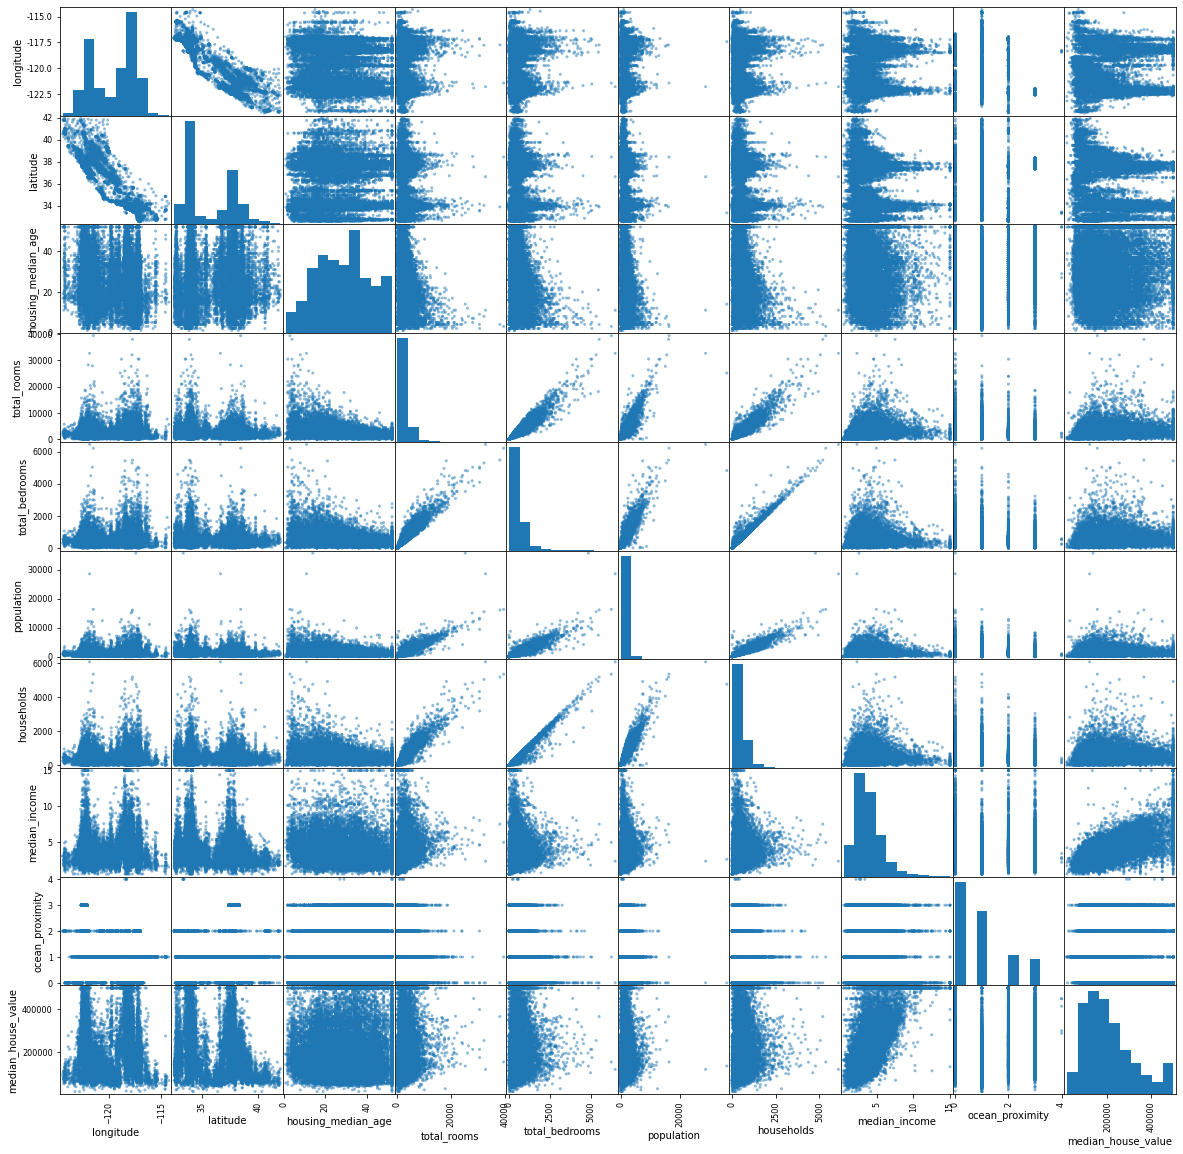

In [13]:
pd.plotting.scatter_matrix(df,figsize=(20,20));

In [49]:
df.corr(method='pearson')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.439787,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,0.390885,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.145469,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,-0.016174,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,-0.021466,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.083097,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,-0.027488,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,-0.039270,0.688355
ocean_proximity,-0.439787,0.390885,0.145469,-0.016174,-0.021466,-0.083097,-0.027488,-0.039270,1.000000,0.020952
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,0.020952,1.000000


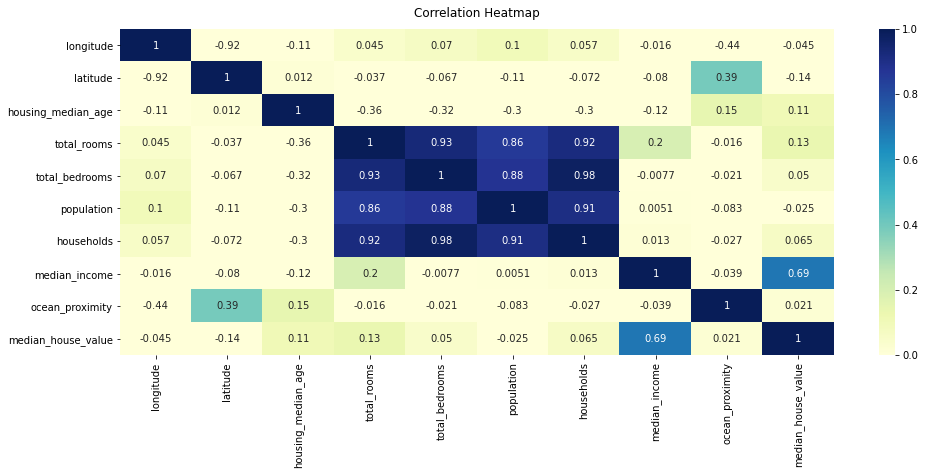

In [54]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), cmap="YlGnBu", vmin=0, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Normalizing the data
- not for linear regression
- used for SVM, logistic regression etc.

In [14]:
#Normalizing Data
#scaler = MinMaxScaler()

#df_normalize = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index) 
#df_normalize

# Defining a class of models 

- multiple linear regression
- forward stepwise selection

#### other version

mse = {}

for col in df.columns[0:-1]:
    
    if(col in ["ocean_proximity", "median_income"]): 
        continue
    
    formula = "median_house_value ~ 1 + ocean_proximity + median_income + " + col
    model = ols(formula, data = df_normalize).fit()
    
    yhat = model.predict()
    
    mse[col] = mean_squared_error(df['median_house_value'], yhat)
    
print(mse)
print(min(mse, key=mse.get))

model_3 = ols("median_house_value ~ 1 + ocean_proximity + median_income + housing_median_age", data = df_normalize).fit()

model_3.summary()

In [15]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,342200.0


In [16]:
#array of models 
formulas = []

### Model 1

In [17]:
mse = {}

for col in df.columns[0:-2]:
    
    formula = "median_house_value ~ 1 + " + col
    model = ols(formula, data = df).fit()
    
    yhat = model.predict()
    
    mse[col] = mean_squared_error(df['median_house_value'], yhat)

print(mse)
print(min(mse, key=mse.get))

model_1 = "median_house_value ~ 1 + " + min(mse, key=mse.get)
formulas.append(model_1)
print(formulas)

{'longitude': 13297278818.913837, 'latitude': 13045984676.185701, 'housing_median_age': 13173801344.26819, 'total_rooms': 13087996064.13197, 'total_bedrooms': 13291846079.610807, 'population': 13316212234.87005, 'households': 13268628301.121332, 'median_income': 7011035574.262171}
median_income
['median_house_value ~ 1 + median_income']


### Model 2

In [18]:
mse = {}

for col in df.columns[0:-2]:
    
    if(col in ["median_income"]): 
        continue
    
    formula = "median_house_value ~ 1 + median_income + " + col
    model = ols(formula, data = df).fit()
    
    yhat = model.predict()
    
    mse[col] = mean_squared_error(df['median_house_value'], yhat)
    
print(mse)
print(min(mse, key=mse.get))

model_2 = "median_house_value ~ 1 + median_income + " + min(mse, key=mse.get)
formulas.append(model_2)
print(formulas)

{'longitude': 6994992881.483832, 'latitude': 6902833669.90174, 'housing_median_age': 6534170155.7035055, 'total_rooms': 7010917438.046472, 'total_bedrooms': 6970722536.0368395, 'population': 6999982341.940119, 'households': 6969767987.739976}
housing_median_age
['median_house_value ~ 1 + median_income', 'median_house_value ~ 1 + median_income + housing_median_age']


### Model 3

In [19]:
mse = {}

for col in df.columns[0:-2]:
    
    if(col in ["median_income","housing_median_age"]): 
        continue
    
    formula = "median_house_value ~ 1 + median_income + housing_median_age + " + col
    model = ols(formula, data = df).fit()
    
    yhat = model.predict()
    
    mse[col] = mean_squared_error(df['median_house_value'], yhat)
    
print(mse)
print(min(mse, key=mse.get))

model_3 = "median_house_value ~ 1 + median_income + housing_median_age + " + min(mse, key=mse.get)
formulas.append(model_3)
print(formulas)

{'longitude': 6531706710.702754, 'latitude': 6424825838.208384, 'total_rooms': 6474898587.889948, 'total_bedrooms': 6333098283.348564, 'population': 6523167594.025739, 'households': 6346667336.749175}
total_bedrooms
['median_house_value ~ 1 + median_income', 'median_house_value ~ 1 + median_income + housing_median_age', 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms']


### Model 4

In [20]:
mse = {}

for col in df.columns[0:-2]:
    
    if(col in ["median_income","housing_median_age","total_bedrooms"]): 
        continue
    
    formula = "median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + " + col
    model = ols(formula, data = df).fit()
    
    yhat = model.predict()
    
    mse[col] = mean_squared_error(df['median_house_value'], yhat)
    
print(mse)
print(min(mse, key=mse.get))

model_4 = "median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + " + min(mse, key=mse.get)
formulas.append(model_4)
print(formulas)

{'longitude': 6328803792.856596, 'latitude': 6243295900.899504, 'total_rooms': 6030441779.676432, 'population': 6014447724.273053, 'households': 6332393493.544312}
population
['median_house_value ~ 1 + median_income', 'median_house_value ~ 1 + median_income + housing_median_age', 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms', 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population']


### Model 5

In [21]:
mse = {}

for col in df.columns[0:-2]:
    
    if(col in ["median_income","housing_median_age","total_bedrooms","population"]): 
        continue
    
    formula = "median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population + " + col
    model = ols(formula, data = df).fit()
    
    yhat = model.predict()
    
    mse[col] = mean_squared_error(df['median_house_value'], yhat)
    
print(mse)
print(min(mse, key=mse.get))

model_5 = "median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population + " + min(mse, key=mse.get)
formulas.append(model_5)
print(formulas)

{'longitude': 6014030030.79589, 'latitude': 5884583483.48695, 'total_rooms': 5840363708.671293, 'households': 5929242167.278438}
total_rooms
['median_house_value ~ 1 + median_income', 'median_house_value ~ 1 + median_income + housing_median_age', 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms', 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population', 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population + total_rooms']


### Model 6

In [22]:
mse = {}

for col in df.columns[0:-2]:
    
    if(col in ["median_income","housing_median_age","total_bedrooms","population","total_rooms"]): 
        continue
    
    formula = "median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population + total_rooms + " + col
    model = ols(formula, data = df).fit()
    
    yhat = model.predict()
    
    mse[col] = mean_squared_error(df['median_house_value'], yhat)
    
print(mse)
print(min(mse, key=mse.get))

model_6 = "median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population + total_rooms + " + min(mse, key=mse.get)
formulas.append(model_6)
print(formulas)

{'longitude': 5836913832.582515, 'latitude': 5754491962.07372, 'households': 5773039795.389614}
latitude
['median_house_value ~ 1 + median_income', 'median_house_value ~ 1 + median_income + housing_median_age', 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms', 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population', 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population + total_rooms', 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population + total_rooms + latitude']


### Model 7

In [23]:
mse = {}

for col in df.columns[0:-2]:
    
    if(col in ["median_income","housing_median_age","total_bedrooms","population","total_rooms","latitude"]): 
        continue
    
    formula = "median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population + total_rooms + latitude + " + col
    model = ols(formula, data = df).fit()
    
    yhat = model.predict()
    
    mse[col] = mean_squared_error(df['median_house_value'], yhat)
    
print(mse)
print(min(mse, key=mse.get))

model_7 = "median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population + total_rooms + latitude + " + min(mse, key=mse.get)
formulas.append(model_7)
print(formulas)

{'longitude': 4847522201.160458, 'households': 5679171711.055665}
longitude
['median_house_value ~ 1 + median_income', 'median_house_value ~ 1 + median_income + housing_median_age', 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms', 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population', 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population + total_rooms', 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population + total_rooms + latitude', 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population + total_rooms + latitude + longitude']


### Model 8

In [24]:
mse = {}

for col in df.columns[0:-2]:
    
    if(col in ["median_income","housing_median_age","total_bedrooms","population","total_rooms","latitude","longitude"]): 
        continue
    
    formula = "median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population + total_rooms + latitude + longitude + " + col
    model = ols(formula, data = df).fit()
    
    yhat = model.predict()
    
    mse[col] = mean_squared_error(df['median_house_value'], yhat)
    
print(mse)
print(min(mse, key=mse.get))

model_8 = "median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population + total_rooms + latitude + longitude + "  + min(mse, key=mse.get)
formulas.append(model_8)
print(formulas)

{'households': 4838057779.6400175}
households
['median_house_value ~ 1 + median_income', 'median_house_value ~ 1 + median_income + housing_median_age', 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms', 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population', 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population + total_rooms', 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population + total_rooms + latitude', 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population + total_rooms + latitude + longitude', 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population + total_rooms + latitude + longitude + households']


In [25]:
formulas[7]

'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population + total_rooms + latitude + longitude + households'

# Cross Validation

In [26]:
#cross validate all models
#utilize sklearn
kf = KFold(n_splits = 5, random_state = 0, shuffle = True)
mse_total =[]
mse_values = np.zeros((8,5))

for x in range(8):
    mse_temp = []
    num_temp = 0
    for train_index, val_index in kf.split(df):
        #trains our model(s)
        #model = ols(formula=formulas[x],data=df_normalize.iloc[train_index,:]).fit()
        model = ols(formula=formulas[x],data=df.iloc[train_index,:]).fit()
    
        #get predictions of the test data
        #yhat = model.predict(df_normalize.iloc[val_index,:]) #len(val_index)
        yhat = model.predict(df.iloc[val_index,:]) #len(val_index)
    
        #MSE(y,yhat)
        y = df['median_house_value'].iloc[val_index]
        #y = df_normalize['median_house_value'].iloc[val_index]
    
        mse_temp.append(mean_squared_error(y,yhat))
        mse_values[x][num_temp] = mean_squared_error(y,yhat)
        num_temp = num_temp+1
    mse_total.append(np.mean(mse_temp))

In [27]:
np.argmin(mse_total)

7

In [28]:
mse_total

[7011599236.221176,
 6535655928.827821,
 6334623438.04648,
 6020697129.324703,
 5847406751.770448,
 5762607706.110048,
 4857988708.053701,
 4851343028.251155]

### 5-fold cross validation for median income model

In [29]:
#cross validate all models
#utilize sklearn
kf = KFold(n_splits = 5, random_state = 0, shuffle = True)
mse_income =[]

for train_index, val_index in kf.split(df):
        #trains our model(s)
        #formula[0] for income
        model = ols(formula=formulas[0],data=df.iloc[train_index,:]).fit()
    
        #get predictions of the test data
        yhat = model.predict(df.iloc[val_index,:]) #len(val_index)
    
        #MSE(y,yhat)
        y = df['median_house_value'].iloc[val_index]
    
        mse_income.append(mean_squared_error(y,yhat))
print("mse for each fold:", mse_income)
print("the mean of the mse:", np.mean(mse_income))

mse for each fold: [6995349974.696963, 7011353067.058873, 7028179278.911212, 6890128548.160392, 7132985312.278436]
the mean of the mse: 7011599236.221176


### 5-fold cross validation for model with all parameters

In [30]:
#cross validate all models
#utilize sklearn
kf = KFold(n_splits = 5, random_state = 0, shuffle = True)
mse_income =[]

for train_index, val_index in kf.split(df):
        #trains our model(s)
        #formula[8] for all features
        model = ols(formula=formulas[7],data=df.iloc[train_index,:]).fit()
    
        #get predictions of the test data
        yhat = model.predict(df.iloc[val_index,:]) #len(val_index)
    
        #MSE(y,yhat)
        #y = df['median_house_value'].iloc[val_index]
        y = df['median_house_value'].iloc[val_index]
    
        mse_income.append(mean_squared_error(y,yhat))
print("mse for each fold:", mse_income)
print("the mean of the mse:", np.mean(mse_income))

mse for each fold: [4800780509.526631, 4746310974.530858, 4846624042.7507925, 4734210729.400547, 5128788885.046949]
the mean of the mse: 4851343028.251155


In [31]:
np.log(mse_total)

array([22.67083165, 22.60053855, 22.56929621, 22.51846889, 22.48926411,
       22.47465594, 22.30389034, 22.30252142])

In [45]:
mse_total

[7011599236.221176,
 6535655928.827821,
 6334623438.04648,
 6020697129.324703,
 5847406751.770448,
 5762607706.110048,
 4857988708.053701,
 4851343028.251155]

In [46]:
formulas

['median_house_value ~ 1 + median_income',
 'median_house_value ~ 1 + median_income + housing_median_age',
 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms',
 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population',
 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population + total_rooms',
 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population + total_rooms + latitude',
 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population + total_rooms + latitude + longitude',
 'median_house_value ~ 1 + median_income + housing_median_age + total_bedrooms + population + total_rooms + latitude + longitude + households']

Text(0.5, 1.0, 'Mean Test MSE from 5-fold')

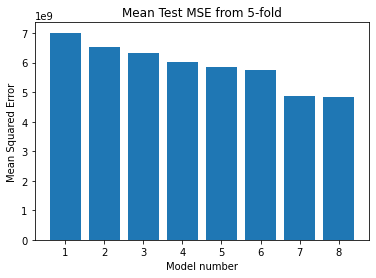

In [44]:
#plot mean test mse 
#x: model numbers
x=[1,2,3,4,5,6,7,8]
#y: mean of each model 
y=mse_total

plt.bar(x, y)
plt.xlabel('Model number')
plt.ylabel('Mean Squared Error')
plt.title('Mean Test MSE from 5-fold')

#pyplot.errorbar 
#yerr = standard deviation of 

In [35]:
#plot k fold? 

# Model Estimation